In [1]:
import numpy as np
import glob
import pandas as pd
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d as mp3d
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
csv_path = 'log/analysis_test_accuracy/landscape/*.csv'
x_dimension = 16

In [3]:
files = glob.glob(csv_path)
data = None
for file in files:
    loaded_data = pd.read_csv(file, header=None)
    data = loaded_data if data is None else pd.concat([data, loaded_data], ignore_index=True)

In [4]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,7,105,37,24,22,122,10,124,3,94,5,224,3,240,30,47,0.175,0.0,103350
1,1,6,193,19,58,11,0,36,2,11,102,12,22,22,203,29,212,0.170,0.0,292527
2,2,7,181,37,1,39,141,22,211,14,184,4,227,3,158,28,30,0.100,0.0,62907
3,3,1,138,18,1,39,125,37,56,13,160,13,202,11,192,30,38,0.275,0.0,302137
4,4,1,39,23,251,5,2,34,54,21,153,39,252,0,152,27,192,0.130,0.0,39581
5,5,0,52,17,69,23,1,37,113,36,140,21,117,7,137,29,241,0.190,0.0,744339
6,6,4,162,39,220,15,69,21,214,6,58,15,255,39,76,30,41,0.110,0.0,406892
7,7,15,104,14,43,21,85,11,126,17,167,12,233,20,40,28,186,0.095,0.0,255039
8,8,7,99,37,131,5,55,35,218,20,161,39,109,20,25,30,230,0.260,0.0,150469
9,9,8,172,39,192,21,237,36,228,37,224,17,130,7,218,28,24,0.355,0.0,530102


In [5]:
df_x = data.iloc[:, 1:x_dimension+1]
df_y = data.iloc[:, x_dimension+1]

In [6]:
df_x

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,7,105,37,24,22,122,10,124,3,94,5,224,3,240,30,47
1,6,193,19,58,11,0,36,2,11,102,12,22,22,203,29,212
2,7,181,37,1,39,141,22,211,14,184,4,227,3,158,28,30
3,1,138,18,1,39,125,37,56,13,160,13,202,11,192,30,38
4,1,39,23,251,5,2,34,54,21,153,39,252,0,152,27,192
5,0,52,17,69,23,1,37,113,36,140,21,117,7,137,29,241
6,4,162,39,220,15,69,21,214,6,58,15,255,39,76,30,41
7,15,104,14,43,21,85,11,126,17,167,12,233,20,40,28,186
8,7,99,37,131,5,55,35,218,20,161,39,109,20,25,30,230
9,8,172,39,192,21,237,36,228,37,224,17,130,7,218,28,24


In [7]:
# get the first 2 pca components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_x.values)
df_pca_x = pd.DataFrame(pca_result)

In [8]:
# prepare x, y, z data for 3D plots
x =df_pca_x.iloc[:, 0].values
y =df_pca_x.iloc[:, 1].values
z =df_y.values

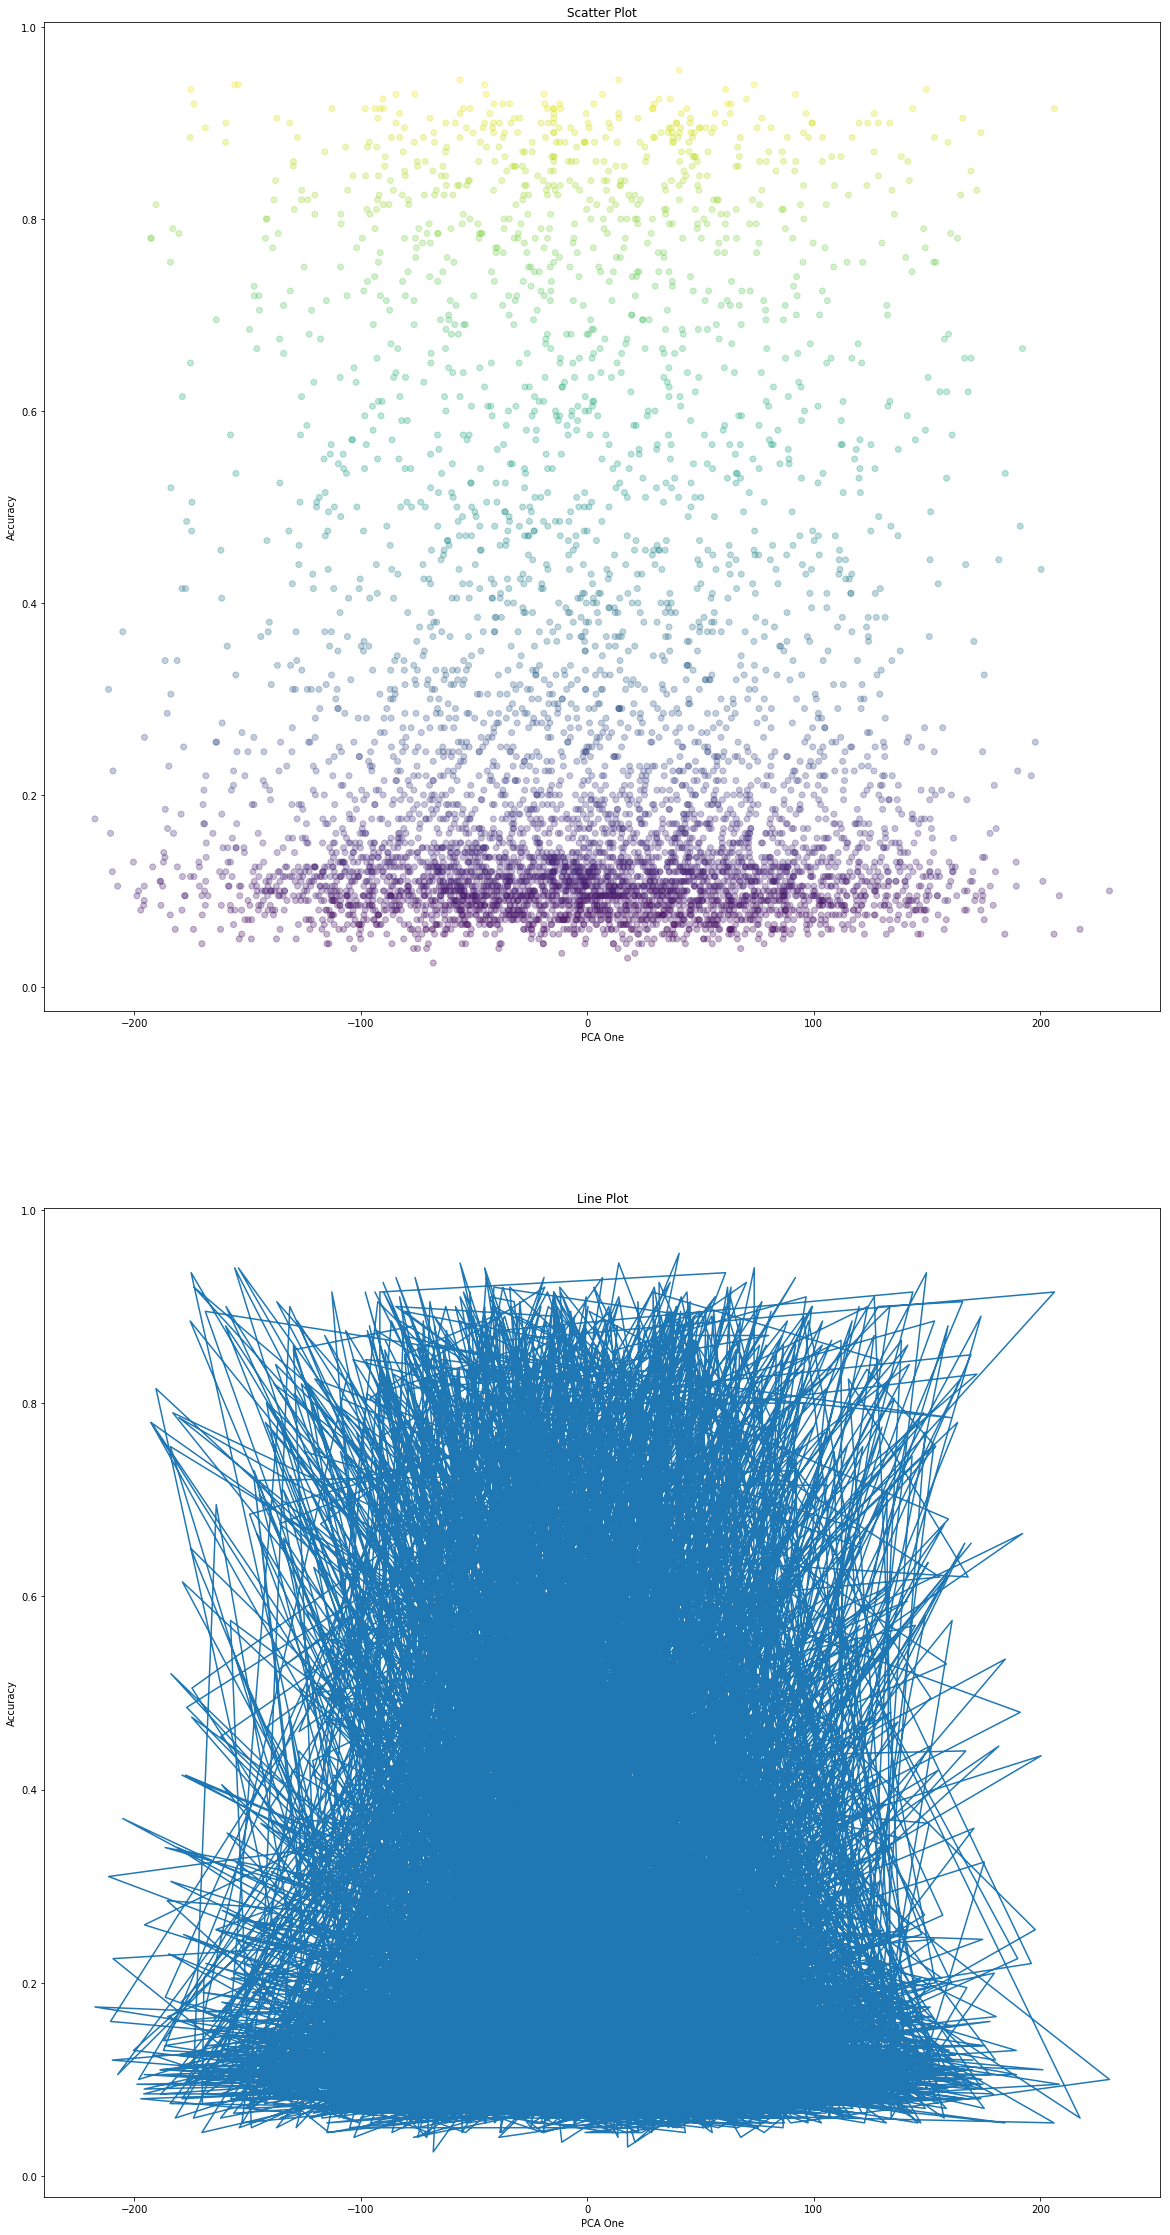

In [168]:
# 1D plot
fig = plt.figure(1, figsize=(20,40))
# scatter plot
plt.subplot(211)
plt.scatter(x, z, c=z, alpha=0.3)
plt.xlabel('PCA One')
plt.ylabel('Accuracy')
plt.title('Scatter Plot')
# line plot
plt.subplot(212)
plt.plot(x, z)
plt.xlabel('PCA One')
plt.ylabel('Accuracy')
plt.title('Line Plot')
plt.show()

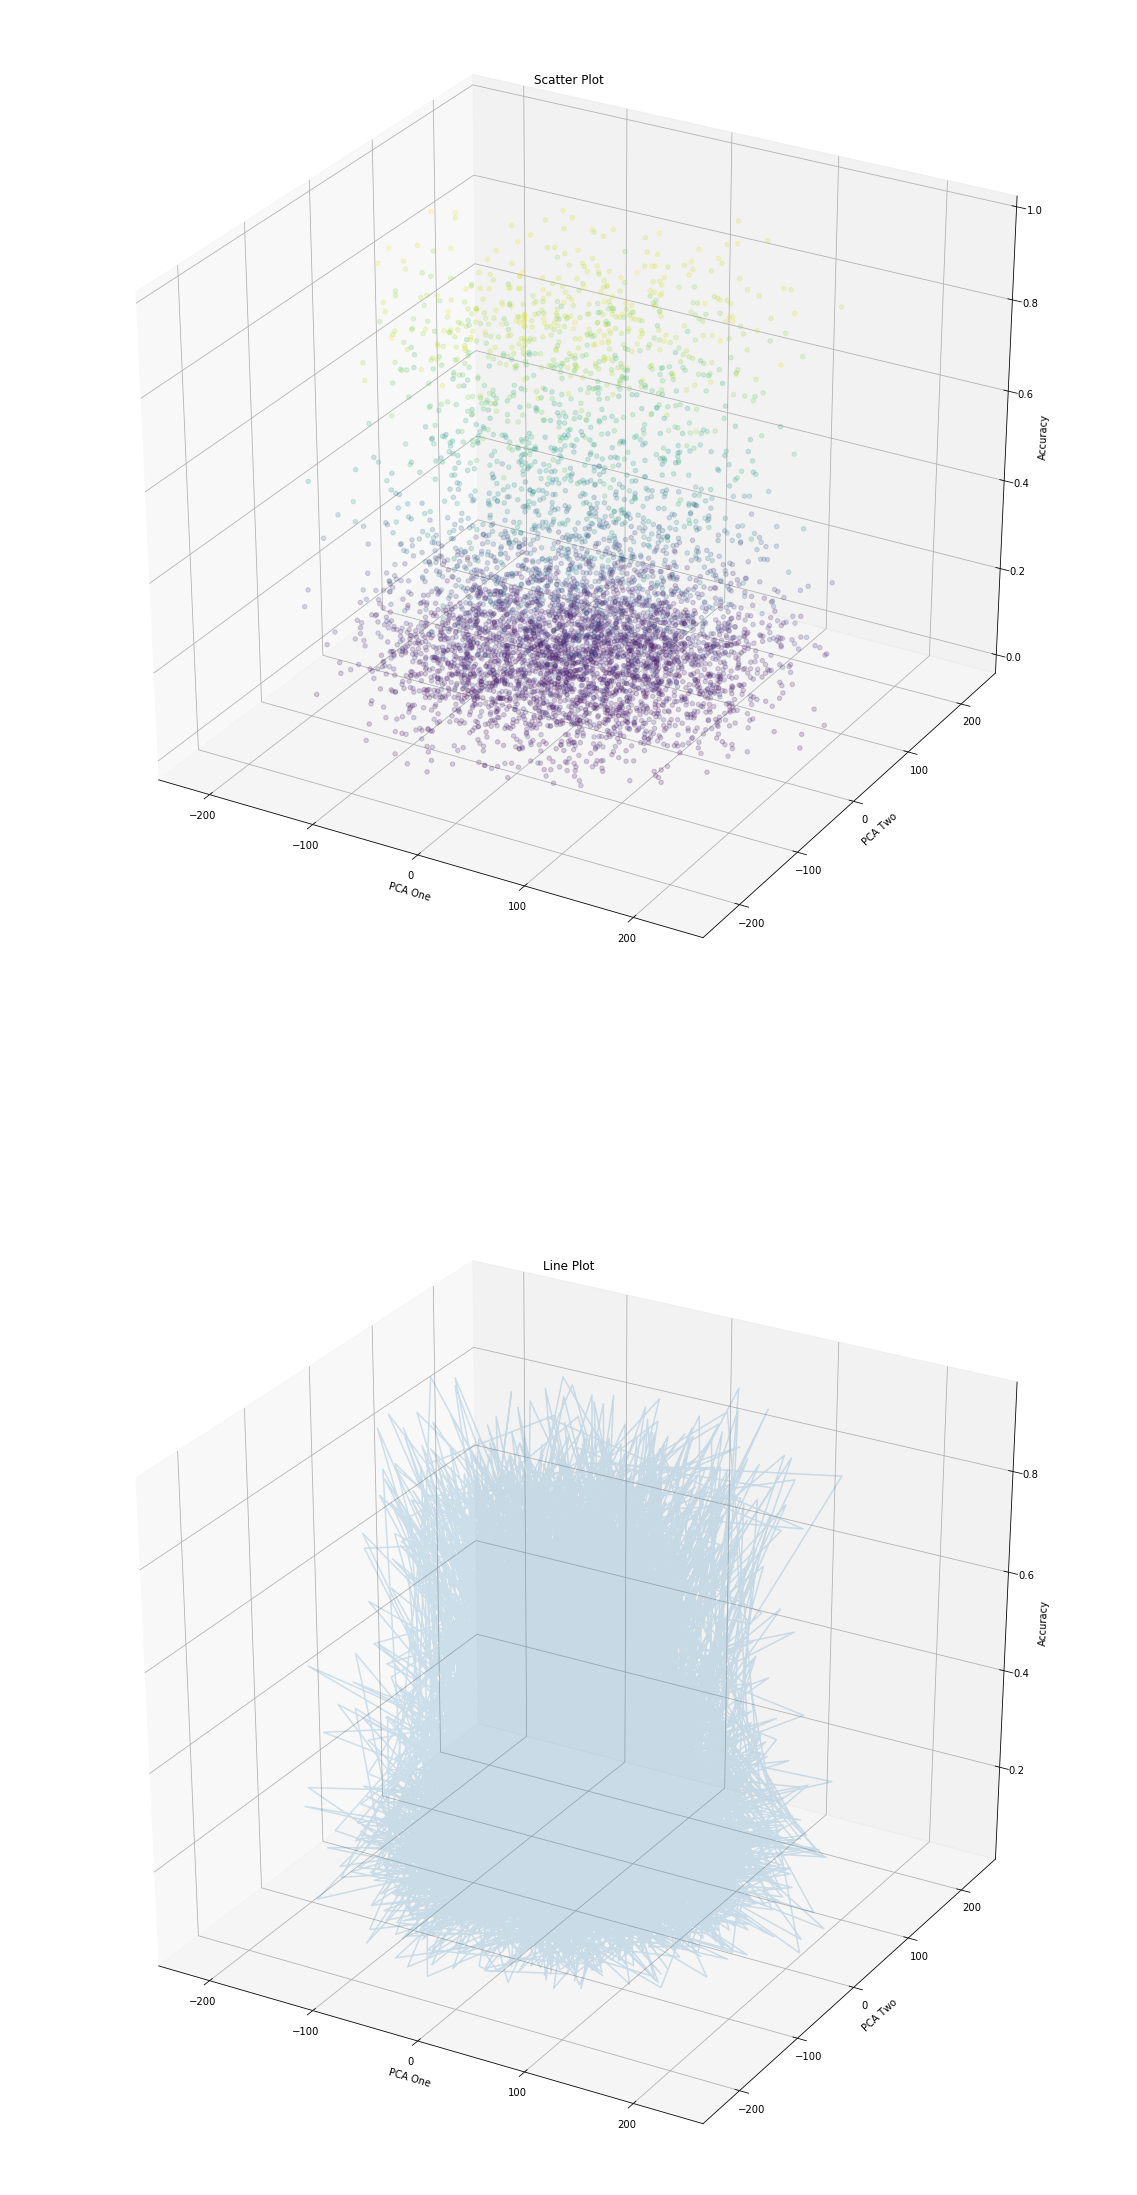

In [171]:
# 3D plot
fig = plt.figure(2, figsize=(20,40))
#scatter plot
ax1 = fig.add_subplot(211, projection='3d')
ax1.scatter(x, y, z, c=z, marker='o', alpha=0.2)
ax1.set_xlabel('PCA One')
ax1.set_ylabel('PCA Two')
ax1.set_zlabel('Accuracy')
ax1.set_title('Scatter Plot')
# line plot
ax2 = fig.add_subplot(212, projection='3d')
ax2.plot(x, y, z, alpha=0.2)
ax2.set_xlabel('PCA One')
ax2.set_ylabel('PCA Two')
ax2.set_zlabel('Accuracy')
ax2.set_title('Line Plot')

plt.show()

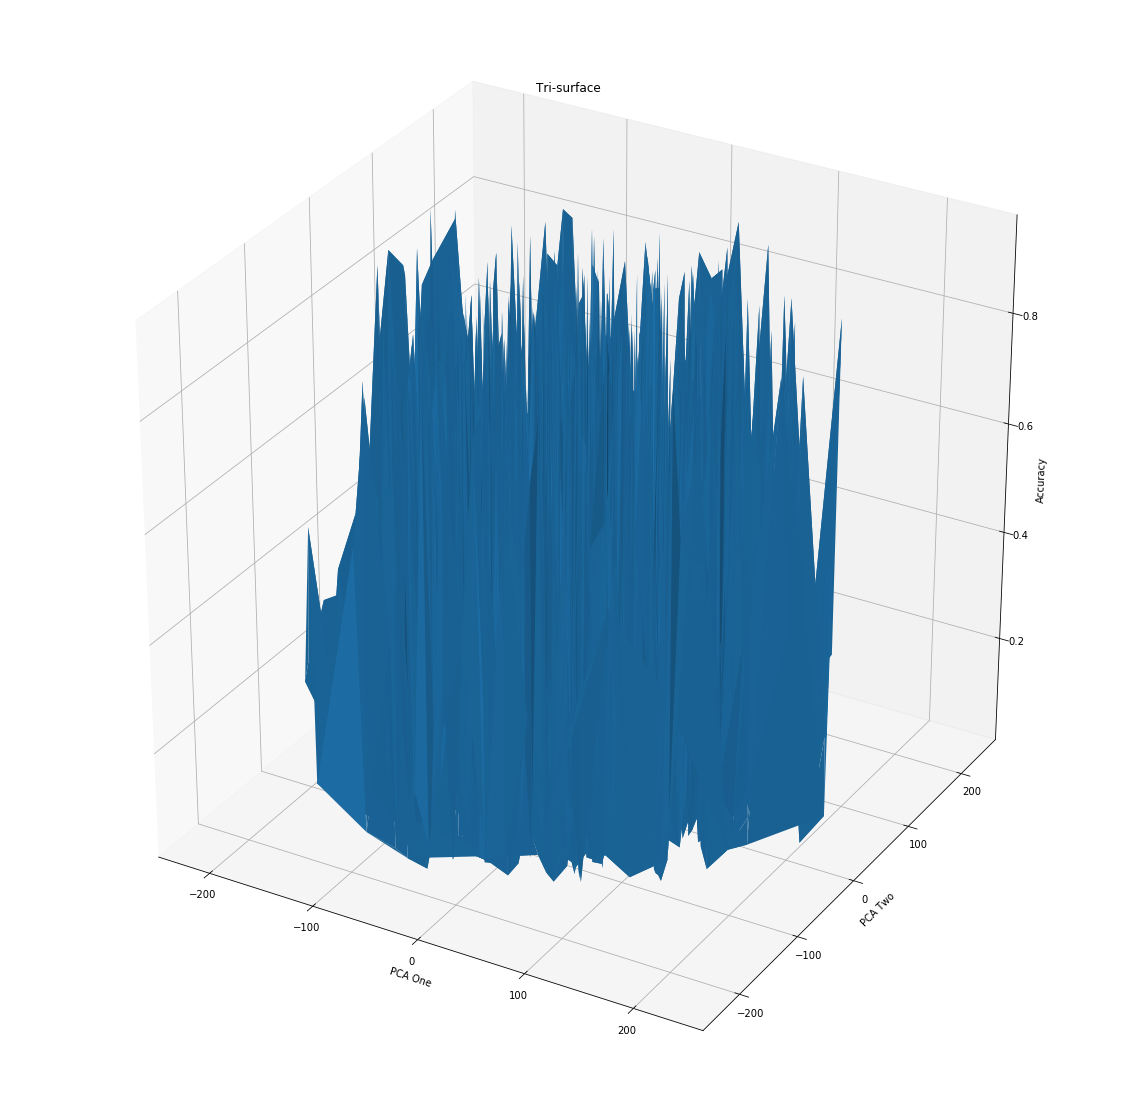

In [14]:
# mesh 3D plot
fig = plt.figure(3, figsize=(20,20))
# Tri-surface
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x, y, z, cmap=plt.cm.CMRmap)
ax.set_xlabel('PCA One')
ax.set_ylabel('PCA Two')
ax.set_zlabel('Accuracy')
ax.set_title('Tri-surface')

plt.show()

In [9]:
files = glob.glob(csv_path)
data_first = None
for file in files:
    loaded_data = pd.read_csv(file, header=None)
    data_first = loaded_data
    break

In [10]:
data_first

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,7,105,37,24,22,122,10,124,3,94,5,224,3,240,30,47,0.175,0.0,103350
1,1,6,193,19,58,11,0,36,2,11,102,12,22,22,203,29,212,0.170,0.0,292527
2,2,7,181,37,1,39,141,22,211,14,184,4,227,3,158,28,30,0.100,0.0,62907
3,3,1,138,18,1,39,125,37,56,13,160,13,202,11,192,30,38,0.275,0.0,302137
4,4,1,39,23,251,5,2,34,54,21,153,39,252,0,152,27,192,0.130,0.0,39581
5,5,0,52,17,69,23,1,37,113,36,140,21,117,7,137,29,241,0.190,0.0,744339
6,6,4,162,39,220,15,69,21,214,6,58,15,255,39,76,30,41,0.110,0.0,406892
7,7,15,104,14,43,21,85,11,126,17,167,12,233,20,40,28,186,0.095,0.0,255039
8,8,7,99,37,131,5,55,35,218,20,161,39,109,20,25,30,230,0.260,0.0,150469
9,9,8,172,39,192,21,237,36,228,37,224,17,130,7,218,28,24,0.355,0.0,530102


In [11]:
df_first_y = data_first.iloc[:, x_dimension+1]

In [12]:
arr_first_y = df_first_y.values.reshape((-1,int((df_first_y.shape[0]+1)/30)))
arr_first_y.shape

(30, 30)

In [13]:
generation_best = np.amax(arr_first_y, axis=1)
generation_best

array([ 0.795,  0.91 ,  0.83 ,  0.925,  0.9  ,  0.93 ,  0.81 ,  0.955,
        0.89 ,  0.915,  0.915,  0.925,  0.895,  0.915,  0.91 ,  0.945,
        0.94 ,  0.88 ,  0.9  ,  0.92 ,  0.88 ,  0.91 ,  0.935,  0.9  ,
        0.775,  0.905,  0.915,  0.86 ,  0.885,  0.915])

In [14]:
# 1D plot generation bests
fig = plt.figure(4, figsize=(10,20))
generations = np.arange(0, generation_best.shape[0])
# scatter plot
plt.subplot(211)
plt.plot(generations, generation_best)
plt.xlabel('Generations')
plt.ylabel('Best accuracy in the generation')
# line plot
plt.plot(generations, generation_best, 'ro')

In [15]:
# 1D plot global best
generations = np.arange(0, generation_best.shape[0])
global_best = []
the_best = 0
for i in range(generation_best.shape[0]):
    if the_best > generation_best[i]:
        global_best.append(the_best)
    else:
        the_best = generation_best[i]
        global_best.append(generation_best[i])
# scatter plot
plt.subplot(212)
plt.plot(generations, global_best)
plt.xlabel('Generations')
plt.ylabel('Global best accuracy')
# line plot
plt.plot(generations, global_best, 'ro')

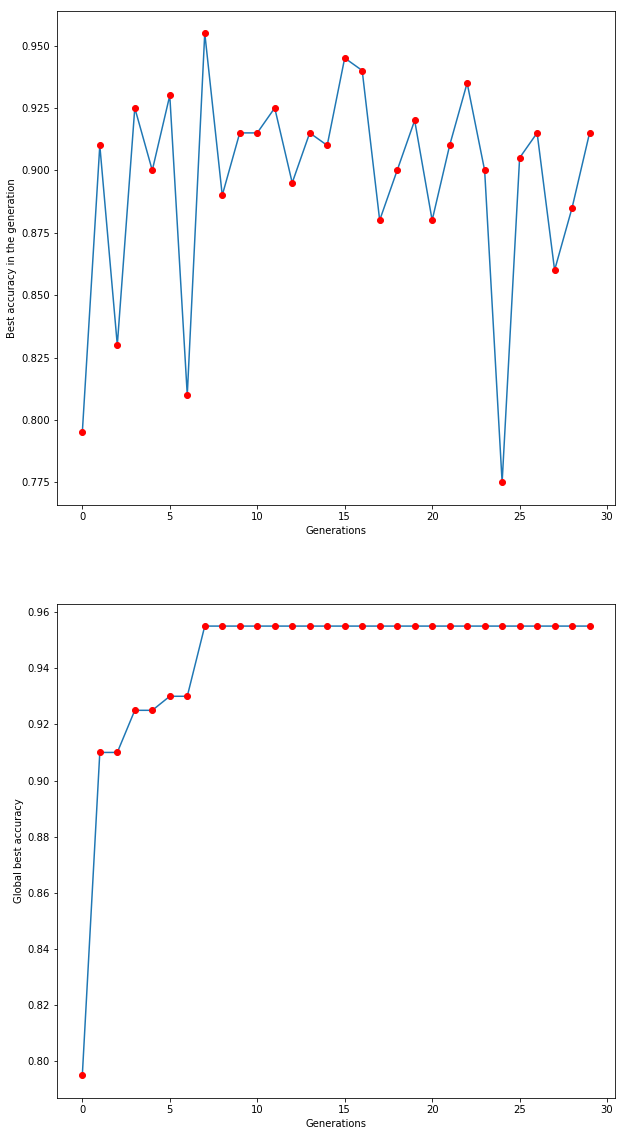

In [16]:
plt.show()
fig.savefig('log/analysis_test_accuracy/landscape/trajectory.png')

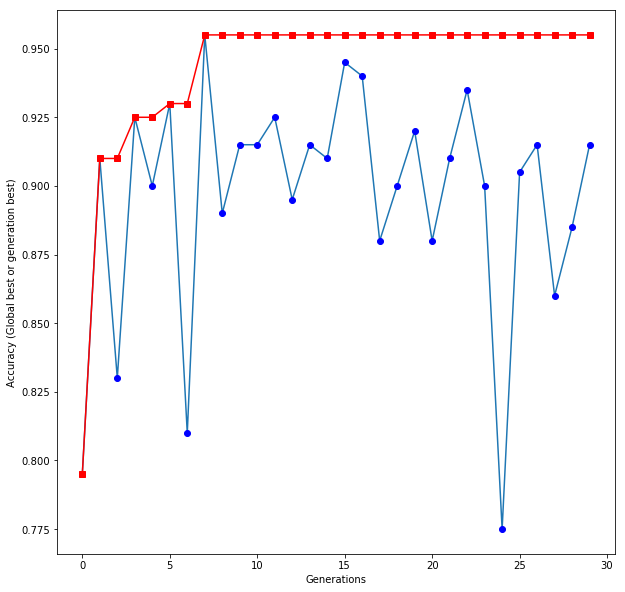

In [29]:
# 1D plot generation bests and global best on the same figure
# 1D plot generation bests
fig = plt.figure(5, figsize=(10,10))
generations = np.arange(0, generation_best.shape[0])
# scatter plot
plt.subplot(111)
plt.plot(generations, generation_best)
plt.xlabel('Generations')
plt.ylabel('Accuracy (Global best or generation best)')
# line plot
plt.plot(generations, generation_best, 'bo')
# 1D plot global best
generations = np.arange(0, generation_best.shape[0])
global_best = []
the_best = 0
for i in range(generation_best.shape[0]):
    if the_best > generation_best[i]:
        global_best.append(the_best)
    else:
        the_best = generation_best[i]
        global_best.append(generation_best[i])
# scatter plot
plt.plot(generations, global_best, 'r')
# line plot
plt.plot(generations, global_best, 'rs')
plt.show()
fig.savefig('log/analysis_test_accuracy/landscape/trajectory-2in1.png')